# ABC Analysis Revision with XYZ Analysis

## Data Preparation

### Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [2]:
# !pip install -q kaggle

In [3]:
# from google.colab import files
# files.upload()

In [4]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

In [5]:
# !kaggle datasets download -d felixzhao/productdemandforecasting

In [6]:
# !mkdir warehouse
# !unzip productdemandforecasting.zip -d warehouse
# !ls warehouse

In [2]:
# Pandas show all column
pd.set_option('display.max_columns', 200)

# change params for matplotlib
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
# df_sales = pd.read_csv('/content/warehouse/Historical Product Demand.csv')
df_sales = pd.read_csv('Historical Product Demand.csv')

### Review data info

In [4]:
df_sales.shape

(1048575, 5)

In [5]:
df_sales.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

### Exploratory Data Analysis

#### Descriptive Statistics

In [6]:
df_sales.head(2)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500


In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [7]:
df_sales.tail(2)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [8]:
df_sales.describe().T

,count,unique,top,freq
Product_Code,1048575,2160,Product_1359,16936
Warehouse,1048575,4,Whse_J,764447
Product_Category,1048575,33,Category_019,481099
Date,1037336,1729,2013/9/27,2075
Order_Demand,1048575,3828,1000,112682


### Data Preparation

In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


#### Converting Order Demand Data as Int

In [10]:
df_sales.Order_Demand = df_sales.Order_Demand.astype('str')

In [11]:
df_sales['Order_Demand'] = df_sales['Order_Demand'].str.replace(')', '')
df_sales['Order_Demand'] = df_sales['Order_Demand'].str.replace('(', '')

C:\Users\AFIFAT~1\AppData\Local\Temp/ipykernel_21664/923508533.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_sales['Order_Demand'] = df_sales['Order_Demand'].str.replace(')', '')
C:\Users\AFIFAT~1\AppData\Local\Temp/ipykernel_21664/923508533.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_sales['Order_Demand'] = df_sales['Order_Demand'].str.replace('(', '')


In [12]:
df_sales['Order_Demand'] = df_sales['Order_Demand'].astype('int')

#### Converting Data Date from Object to Datetime

In [13]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

#### Checking for Missing Data

In [14]:
df_sales.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

#### Dropping Missing Data

In [15]:
df_sales = df_sales.dropna()

#### Sorting Data Based on Date

In [16]:
df_sales = df_sales.sort_values('Date')

In [17]:
df_sales.head(2)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011-01-08,2
72252,Product_1724,Whse_A,Category_003,2011-05-31,108


#### Check for Data Duplication

In [18]:
df_sales.duplicated().sum()

114520

In [19]:
df_dupl = df_sales.drop_duplicates()

In [20]:
df_dupl.duplicated().sum()

0

In [21]:
df_dupl.shape

(922816, 5)

#### Feature Engineering

In [22]:
df_fe = df_dupl.loc[:, ['Product_Code', 'Date', 'Order_Demand']]
df_fe.head(2)

,Product_Code,Date,Order_Demand
44799,Product_0965,2011-01-08,2
72252,Product_1724,2011-05-31,108


In [23]:
df_month = df_fe.loc[df_fe['Date'] > '2016-06-30']
df_month = df_month.loc[df_month['Date'] < '2017-01-01']
df_month['month'] = df_month.Date.apply(lambda x: x.strftime('%Y %B'))
df_month = df_month.groupby('month')['Order_Demand'].sum().reset_index()
df_month['month'] = pd.to_datetime(df_month['month'])
df_month = df_month.sort_values('month')
df_month

,month,Order_Demand
2,2016-07-01,82391815
0,2016-08-01,75330163
5,2016-09-01,71331163
4,2016-10-01,77462215
3,2016-11-01,82041593
1,2016-12-01,74354620


In [24]:
df_month['month'] = pd.DatetimeIndex(df_month['month']).month

import calendar
df_month['name_month'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])
df_month

,month,Order_Demand,name_month
2,7,82391815,Jul
0,8,75330163,Aug
5,9,71331163,Sep
4,10,77462215,Oct
3,11,82041593,Nov
1,12,74354620,Dec


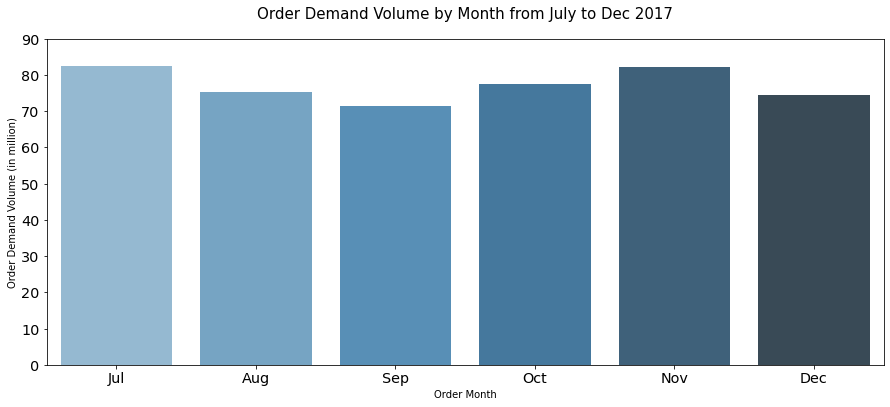

In [25]:
f, ax = plt.subplots(figsize = (15, 6))

ax = sns.barplot(x = "name_month", 
                 y = "Order_Demand",
                 data = df_month, 
                 palette = "Blues_d").set(xlabel='Order Month',
                                          ylabel='Order Demand Volume (in million)')
                 
plt.title('Order Demand Volume by Month from July to Dec 2017', fontsize = 15, pad = 20)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
# plt.savefig('volume rev.png')
plt.show() 

### Performing ABC Classification

In [26]:
def abc(percentage):
  if percentage >= 0 and percentage <= 5:
    return 'A'
  elif percentage > 5 and percentage <= 20:
    return 'B'
  else:
    return 'C'

In [27]:
df_3_months = df_fe.loc[df_fe['Date'] > '2016-09-30']
df_3_months = df_3_months.loc[df_fe['Date'] < '2017']
df_3_months.head(2)

,Product_Code,Date,Order_Demand
970172,Product_2144,2016-10-02,10
970170,Product_2136,2016-10-02,20


In [117]:
# df_3_months.to_csv('Product Demand 3 Months.csv')

In [29]:
df_6_months = df_fe.loc[df_fe['Date'] > '2016-06-30']
df_6_months = df_6_months.loc[df_fe['Date'] < '2017']
df_6_months.head(2)

,Product_Code,Date,Order_Demand
1041269,Product_1891,2016-07-01,4
1029263,Product_1674,2016-07-01,6


In [30]:
# df_6_months.to_csv('Product Demand 6 Months.csv')

In [34]:
df_sum = pd.DataFrame(df_3_months['Product_Code'].value_counts().reset_index())
df_sum = df_sum.rename({'index':'Product_Code', 'Product_Code':'order_frequency'}, axis = 1)

In [35]:
df_sum.head(2)

,Product_Code,order_frequency
0,Product_1359,455
1,Product_1378,346


#### Trial 1

In [36]:
# df_freq = df_sum.copy()
# df_freq['rank'] = df_sum.index + 1
# # df_freq.reset_index()
# df_freq

In [37]:
# df_freq['freq_cumsum'] = df_freq['rank'].cumsum()
# df_freq['freq_total'] = df_freq['rank'].sum()
# df_freq['freq_run_perc'] = round(((df_freq['freq_cumsum'] / df_freq['freq_total']) * 100), 2)
# df_freq

In [38]:
# df_freq.info()

In [39]:
# df_freq['abc'] = df_freq['freq_run_perc'].apply(abc)
# df_freq

In [40]:
# df_freq

In [41]:
# abc = df_freq.loc[:, ['Product_Code', 'order_frequency', 'abc']]
# abc.head()

In [42]:
# df_freq['abc'].value_counts()

In [43]:
# data_merge = df_3_months.merge(abc, how = 'left', on = 'Product_Code')
# data_merge

In [44]:
# data_merge['abc'].value_counts()

In [45]:
# data_merge.groupby('abc')['Order_Demand'].sum()

In [46]:
# data_merge['Order_Demand'].sum()

In [47]:
# data_merge.groupby('abc')['Product_Code'].nunique()

#### Trial 2

In [48]:
df_try = df_sum.copy()
df_try['rank'] = df_sum.index + 1
# df_freq.reset_index()
df_try.head(2)

,Product_Code,order_frequency,rank
0,Product_1359,455,1
1,Product_1378,346,2


In [49]:
df_try['total'] = len(df_try)
df_try.head(2)

,Product_Code,order_frequency,rank,total
0,Product_1359,455,1,2077
1,Product_1378,346,2,2077


In [50]:
df_try['rank_cumsum'] = round(((df_try['rank'] / df_try['total']) * 100), 2)
df_try.head(2)

,Product_Code,order_frequency,rank,total,rank_cumsum
0,Product_1359,455,1,2077,0.05
1,Product_1378,346,2,2077,0.10


In [51]:
df_try['class'] = df_try['rank_cumsum'].apply(abc)
df_try.head(2)

,Product_Code,order_frequency,rank,total,rank_cumsum,class
0,Product_1359,455,1,2077,0.05,A
1,Product_1378,346,2,2077,0.10,A


In [52]:
class_counts = pd.DataFrame(df_try['class'].value_counts().sort_values().reset_index())
class_counts = class_counts.rename(columns={'index':'class', 'class':'class_counts'})
class_counts

,class,class_counts
0,A,103
1,B,312
2,C,1662


In [53]:
classified = df_try.loc[:, ['Product_Code', 'order_frequency', 'class']]
classified.loc[classified['class'] == 'A'].head(2)

,Product_Code,order_frequency,class
0,Product_1359,455,A
1,Product_1378,346,A


In [54]:
demand_freq = pd.DataFrame(classified.groupby('class')['order_frequency'].sum())
demand_freq = demand_freq.reset_index()
demand_freq

,class,order_frequency
0,A,14913
1,B,13637
2,C,15303


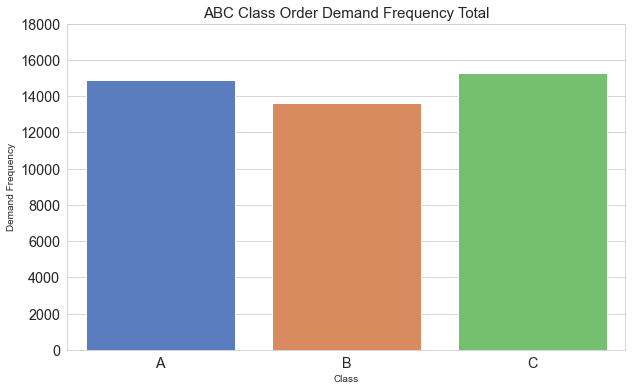

In [55]:
sns.set_style('whitegrid')
bar, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = demand_freq['class'], y = demand_freq['order_frequency'], data = demand_freq, ci = None, palette = "muted", orient = 'v')
ax.set_title("ABC Class Order Demand Frequency Total", fontsize = 15)
ax.set_xlabel("Class")
ax.set_ylabel("Demand Frequency")

labels, locations = plt.yticks()
plt.yticks(labels, (labels/1).astype(int))
# plt.savefig('order demand freq.png')
plt.show()

In [56]:
merge = df_3_months.merge(classified, how = 'left', on = 'Product_Code')
merge.head(2)

,Product_Code,Date,Order_Demand,order_frequency,class
0,Product_2144,2016-10-02,10,26,B
1,Product_2136,2016-10-02,20,20,C


In [57]:
class_perc = merge.groupby('class')['Product_Code'].nunique()
class_perc

class
A     103
B     312
C    1662
Name: Product_Code, dtype: int64

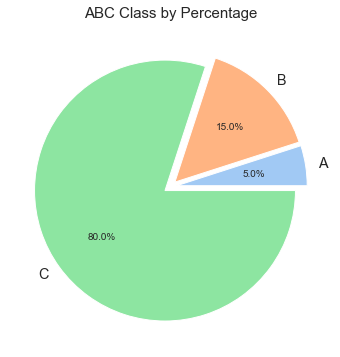

In [58]:
pie, ax = plt.subplots(figsize = [10, 6])
labels = class_perc.keys()
colors = sns.color_palette('pastel')[0:5]
plt.pie(x = class_perc, autopct="%.1f%%",
        colors = colors, explode=[0.05]*3,
        labels = labels, pctdistance = 0.6)
plt.title("ABC Class by Percentage", fontsize = 15)
# plt.savefig('abc percentage.png')
plt.show()

In [59]:
demand_total = pd.DataFrame(merge.groupby('class')['Order_Demand'].sum().reset_index())
demand_total

,class,Order_Demand
0,A,136533351
1,B,55168000
2,C,42157077


In [60]:
demand_perc = merge.groupby('class')['Order_Demand'].sum()
demand_perc

class
A    136533351
B     55168000
C     42157077
Name: Order_Demand, dtype: int32

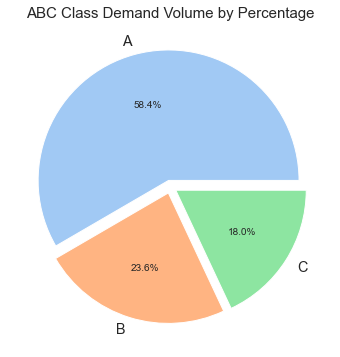

In [61]:
pie, ax = plt.subplots(figsize = [10, 6])
labels = demand_perc.keys()
colors = sns.color_palette('pastel')[0:5]
plt.pie(x = demand_perc, autopct="%.1f%%",
        colors = colors, explode=[0.05]*3,
        labels = labels, pctdistance = 0.6)
plt.title("ABC Class Demand Volume by Percentage", fontsize = 15)
# plt.savefig('demand percentage.png')
plt.show()

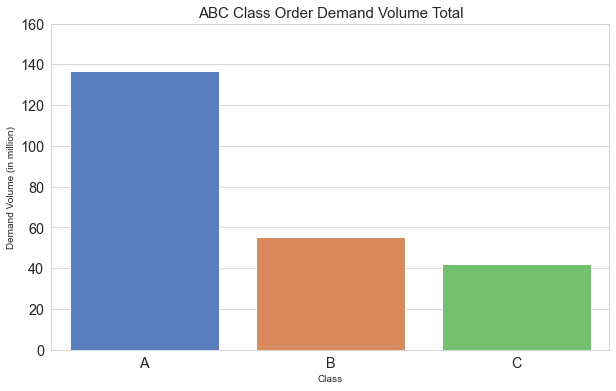

In [62]:
sns.set_style('whitegrid')
bar, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x = demand_total['class'], y = demand_total['Order_Demand'], data = demand_total, ci = None, palette = "muted", orient = 'v')
ax.set_title("ABC Class Order Demand Volume Total", fontsize = 15)
ax.set_xlabel("Class")
ax.set_ylabel("Demand Volume (in million)")

labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
# plt.savefig('abc demand value.png')
plt.show()

### Performing XYZ Classification

In [63]:
data_month = df_3_months.copy()
# data_month = data_month.reset_index()

In [64]:
data_month['Date'] = pd.to_datetime(data_month['Date'])
# data_month = data_month[data_month['Date'] < '2017']

In [65]:
data_month.head(2)

,Product_Code,Date,Order_Demand
970172,Product_2144,2016-10-02,10
970170,Product_2136,2016-10-02,20


In [66]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43853 entries, 970172 to 999914
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product_Code  43853 non-null  object        
 1   Date          43853 non-null  datetime64[ns]
 2   Order_Demand  43853 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 1.2+ MB


In [67]:
data_month['month'] = data_month.Date.apply(lambda x: x.strftime('%B'))
data_month.head(2)

,Product_Code,Date,Order_Demand,month
970172,Product_2144,2016-10-02,10,October
970170,Product_2136,2016-10-02,20,October


In [68]:
data_group = pd.DataFrame(data_month.groupby(['Product_Code', 'month'])['Order_Demand'].sum())
data_group = data_group.reset_index()
# data_group['month_date'] = pd.to_datetime(data_group['month'])
# data_group = data_group.sort_values('month_date')
data_group.head(2)

,Product_Code,month,Order_Demand
0,Product_0001,December,1700
1,Product_0001,November,600


#### Making Data Pivot

In [69]:
data_pivot = data_group.copy()
data_pivot = data_pivot.pivot(index='Product_Code', columns = 'month', values = 'Order_Demand')
data_pivot = data_pivot.fillna(0)
data_pivot.head(2)

month,December,November,October
Product_Code,,,
Product_0001,1700.0,600.0,2100.0
Product_0002,137000.0,59000.0,72500.0


In [70]:
months = ['October', 'November', 'December']
data_pivot = data_pivot[months]
data_pivot.head(2)

month,October,November,December
Product_Code,,,
Product_0001,2100.0,600.0,1700.0
Product_0002,72500.0,59000.0,137000.0


#### Calculating Demand Standard Deviation

In [71]:
data_calc = data_pivot.copy()

In [72]:
data_calc['std'] = round((data_calc[months].std(axis=1)), 2)
data_calc.head(2)

month,October,November,December,std
Product_Code,,,,
Product_0001,2100.0,600.0,1700.0,776.75
Product_0002,72500.0,59000.0,137000.0,41686.33


#### Calculating Total Demand within Period Given

In [73]:
data_calc['total'] = round((data_calc[months].sum(axis=1)), 2)
data_calc.head(2)

month,October,November,December,std,total
Product_Code,,,,,
Product_0001,2100.0,600.0,1700.0,776.75,4400.0
Product_0002,72500.0,59000.0,137000.0,41686.33,268500.0


#### Calculating Average Demand within Period Given

In [74]:
data_calc['avg'] = round((data_calc[months].mean(axis = 1)), 2)
data_calc.head(2)

month,October,November,December,std,total,avg
Product_Code,,,,,,
Product_0001,2100.0,600.0,1700.0,776.75,4400.0,1466.67
Product_0002,72500.0,59000.0,137000.0,41686.33,268500.0,89500.00


#### Calculating Covariance Demand

In [75]:
data_calc['cov'] = round((data_calc['std'] / data_calc['avg']), 2)
data_calc.sort_values(by='cov', ascending=True, inplace = True)
data_calc.head(2)

month,October,November,December,std,total,avg,cov
Product_Code,,,,,,,
Product_1063,6.0,6.0,6.0,0.0,18.0,6.0,0.0
Product_2044,40000.0,40000.0,40000.0,0.0,120000.0,40000.0,0.0


#### Getting dataset info and statistics (min, mean, max)

In [76]:
data_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077 entries, Product_1063 to Product_1647
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   October   2077 non-null   float64
 1   November  2077 non-null   float64
 2   December  2077 non-null   float64
 3   std       2077 non-null   float64
 4   total     2077 non-null   float64
 5   avg       2077 non-null   float64
 6   cov       2077 non-null   float64
dtypes: float64(7)
memory usage: 129.8+ KB


In [77]:
min = data_calc['cov'].min()
avg = "{:.2f}".format(data_calc['cov'].mean())
max = data_calc['cov'].max()

print("Minimum Coefficient of Demand Variation Value = ", min)
print("Average Coefficient of Demand Variation Value = ", avg)
print("Maximum Coefficient of Demand Variation Value = ", max)

Minimum Coefficient of Demand Variation Value =  0.0
Average Coefficient of Demand Variation Value =  0.73
Maximum Coefficient of Demand Variation Value =  1.76


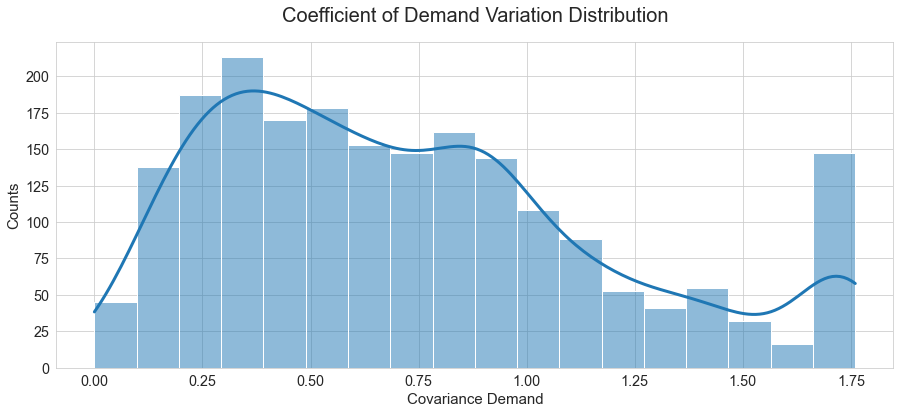

In [78]:
f, ax = plt.subplots(figsize = (15, 6))
ax = sns.histplot(data_calc['cov'], kde=True)
plt.title('Coefficient of Demand Variation Distribution', fontsize = 20, pad = 20)
plt.xlabel('Covariance Demand', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

#### Classifying XYZ Classes

In [79]:
def xyz(cov):
  if cov <= 0.5:
    return 'X'
  elif cov > 0.5 and cov <= 1.0:
    return 'Y'
  else:
    return 'Z'

In [80]:
data_xyz = data_calc.copy()

In [81]:
data_xyz['xyz_class'] = data_xyz['cov'].apply(xyz)
data_xyz['xyz_class'].value_counts()

X    799
Y    790
Z    488
Name: xyz_class, dtype: int64

In [82]:
data_xyz.head(2)

month,October,November,December,std,total,avg,cov,xyz_class
Product_Code,,,,,,,,
Product_1063,6.0,6.0,6.0,0.0,18.0,6.0,0.0,X
Product_2044,40000.0,40000.0,40000.0,0.0,120000.0,40000.0,0.0,X


In [83]:
xyz = data_xyz.copy()
xyz.groupby('xyz_class').agg(
    total_demand = ('total', 'sum'),
    std_demand = ('std', 'mean'),
    avg_demand = ('avg', 'mean'),
    avg_cov = ('cov', 'mean')
)

,total_demand,std_demand,avg_demand,avg_cov
xyz_class,,,,
X,204125800.0,21098.315620,85158.865307,0.299862
Y,25196694.0,7777.389810,10631.516532,0.757835
Z,4535934.0,3883.457848,3098.315717,1.398668


In [84]:
xyz_monthly = data_xyz.groupby('xyz_class').agg(
    oct = ('October', 'sum'),
    nov = ('November', 'sum'),
    dec = ('December', 'sum')
)
xyz_monthly

,oct,nov,dec
xyz_class,,,
X,66156452.0,72310120.0,65659228.0
Y,9915420.0,7673016.0,7608258.0
Z,1390343.0,2058457.0,1087134.0


In [85]:
xyz_monthly_unstacked = xyz_monthly.unstack('xyz_class').to_frame()
xyz_monthly_unstacked = xyz_monthly_unstacked.reset_index().rename(columns = {'level_0':'month', 0:'demand'})
xyz_monthly_unstacked

,month,xyz_class,demand
0,oct,X,66156452.0
1,oct,Y,9915420.0
2,oct,Z,1390343.0
3,nov,X,72310120.0
4,nov,Y,7673016.0
5,nov,Z,2058457.0
6,dec,X,65659228.0
7,dec,Y,7608258.0
8,dec,Z,1087134.0


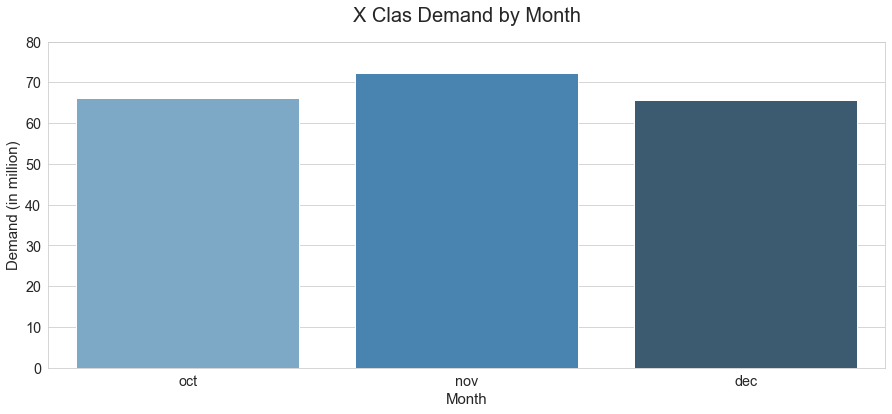

In [86]:
f, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x = 'month',
                 y = 'demand',
                 data = xyz_monthly_unstacked[xyz_monthly_unstacked['xyz_class'] == 'X'],
                 palette = 'Blues_d')
plt.title('X Clas Demand by Month', fontsize = 20, pad = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Demand (in million)', fontsize = 15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
# plt.savefig('X class demand.png')
plt.show()

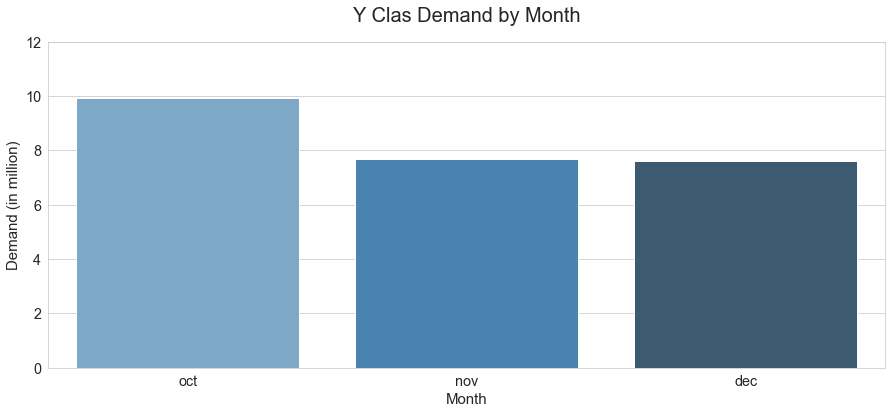

In [87]:
f, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x = 'month',
                 y = 'demand',
                 data = xyz_monthly_unstacked[xyz_monthly_unstacked['xyz_class'] == 'Y'],
                 palette = 'Blues_d')
plt.title('Y Clas Demand by Month', fontsize = 20, pad = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Demand (in million)', fontsize = 15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
# plt.savefig('X class demand.png')
plt.show()

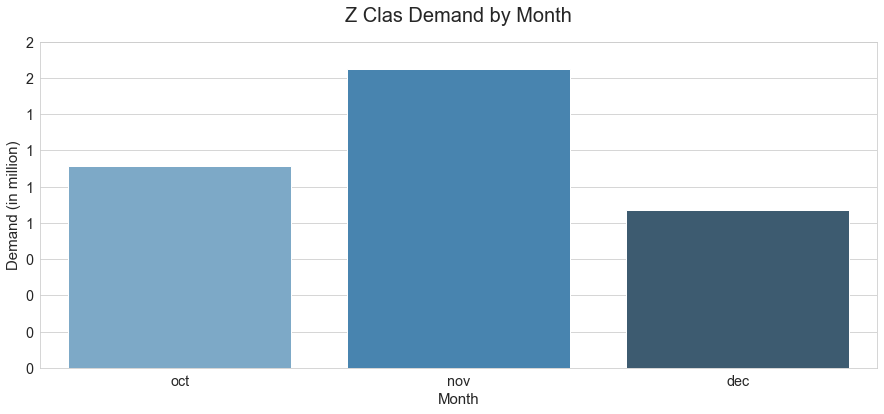

In [88]:
f, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x = 'month',
                 y = 'demand',
                 data = xyz_monthly_unstacked[xyz_monthly_unstacked['xyz_class'] == 'Z'],
                 palette = 'Blues_d')
plt.title('Z Clas Demand by Month', fontsize = 20, pad = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Demand (in million)', fontsize = 15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
# plt.savefig('X class demand.png')
plt.show()

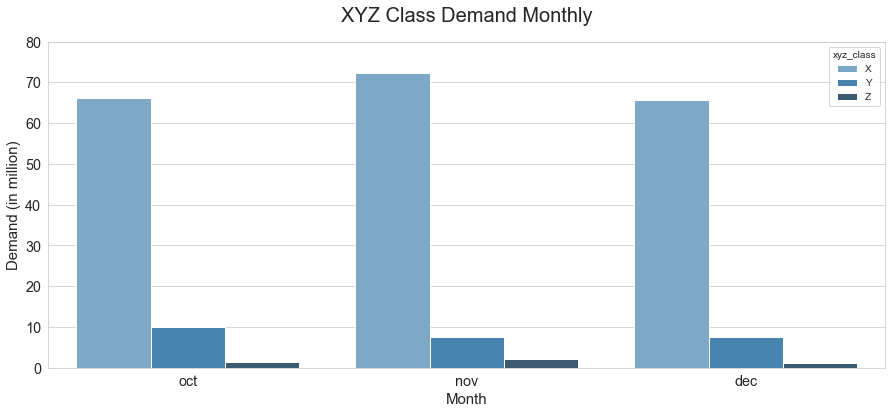

In [89]:
f, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x = 'month',
                 y = 'demand',
                 hue = 'xyz_class',
                 data = xyz_monthly_unstacked,
                 palette = 'Blues_d')
plt.title('XYZ Class Demand Monthly', fontsize = 20, pad = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Demand (in million)', fontsize = 15)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
# plt.savefig('X class demand.png')
plt.show()

### Performing ABCXYZ Classification

In [90]:
xyz_classified = data_xyz.copy().reset_index()
xyz_classified = xyz_classified.loc[:, ['Product_Code', 'xyz_class']]
# xyz_classified.loc[classified['xyz_class'] == 'X']
xyz_classified.head(2)

month,Product_Code,xyz_class
0,Product_1063,X
1,Product_2044,X


In [91]:
abc_classified = classified.copy()
abc_classified.drop(columns='order_frequency', inplace=True)
abc_classified = abc_classified.rename({'class':'abc_class'}, axis = 1)
abc_classified.head(2)

,Product_Code,abc_class
0,Product_1359,A
1,Product_1378,A


In [92]:
data_abcxyz = abc_classified.merge(xyz_classified, on = 'Product_Code', how = 'left')
data_abcxyz.head(2)

,Product_Code,abc_class,xyz_class
0,Product_1359,A,X
1,Product_1378,A,X


In [93]:
data_abcxyz['abc_xyz_class'] = data_abcxyz['abc_class'].astype(str) + data_abcxyz['xyz_class'].astype(str)
data_abcxyz.head(2)

,Product_Code,abc_class,xyz_class,abc_xyz_class
0,Product_1359,A,X,AX
1,Product_1378,A,X,AX


In [94]:
merge_abcxyz = df_3_months.merge(data_abcxyz, on = 'Product_Code', how = 'left')
merge_abcxyz.head(2)

,Product_Code,Date,Order_Demand,abc_class,xyz_class,abc_xyz_class
0,Product_2144,2016-10-02,10,B,Y,BY
1,Product_2136,2016-10-02,20,C,Y,CY


In [95]:
data_summary = merge_abcxyz.groupby('abc_xyz_class').agg(
    total_demand = ('Order_Demand', sum),
    avg_demand = ('Order_Demand', 'mean')
).reset_index()
data_summary['avg_demand'] = round((data_summary['avg_demand']), 2)
# data_summary.sort_values(by='total_demand', ascending = False, inplace = True)
data_summary

,abc_xyz_class,total_demand,avg_demand
0,AX,133532011,9749.71
1,AY,3001340,2466.18
2,BX,47562347,4880.69
3,BY,6377501,1773.50
4,BZ,1228152,4149.16
5,CX,23031442,3704.59
6,CY,15817853,2484.35
7,CZ,3307782,1216.54


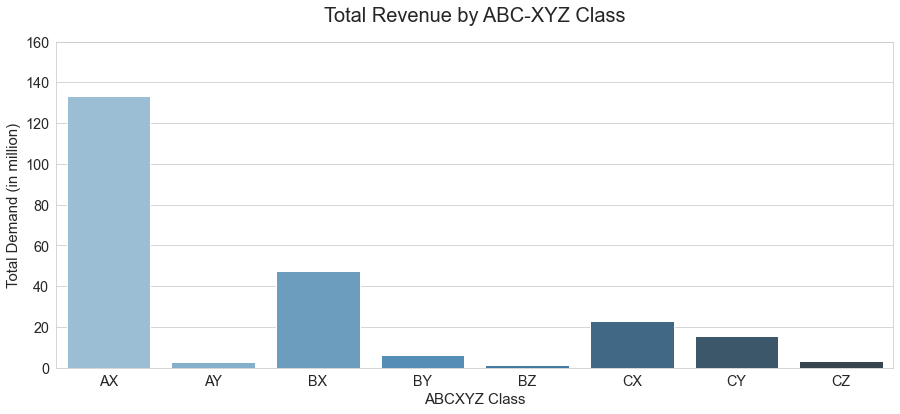

In [96]:
f, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x = 'abc_xyz_class',
                 y = 'total_demand',
                 data = data_summary,
                 palette = 'Blues_d')
plt.title('Total Revenue by ABC-XYZ Class', fontsize = 20, pad = 20)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel('Total Demand (in million)', fontsize = 15)
plt.xlabel('ABCXYZ Class', fontsize = 15)
# plt.savefig('ABCXYZ rev.png')
plt.show()

### Performing Class Recommendation Duration

#### Load Data

In [97]:
month_1 = df_fe.loc[(df_fe['Date'].dt.year == 2016) & (df_fe['Date'].dt.month == 10)]
month_1.head(2)

,Product_Code,Date,Order_Demand
970172,Product_2144,2016-10-02,10
970170,Product_2136,2016-10-02,20


In [98]:
month_2 = df_fe.loc[(df_fe['Date'].dt.year == 2016) & ((df_fe['Date'].dt.month == 10) | (df_fe['Date'].dt.month == 11))]
month_2.head(2)

,Product_Code,Date,Order_Demand
970172,Product_2144,2016-10-02,10
970170,Product_2136,2016-10-02,20


In [99]:
month_3 = df_fe.loc[(df_fe['Date'].dt.year == 2016) & ((df_fe['Date'].dt.month == 10) | (df_fe['Date'].dt.month == 11)| (df_fe['Date'].dt.month == 12))]
month_3.head(2)

,Product_Code,Date,Order_Demand
970172,Product_2144,2016-10-02,10
970170,Product_2136,2016-10-02,20


#### Calculating Reorder Frequency for Each Month

In [100]:
sum_1 = pd.DataFrame(month_1['Product_Code'].value_counts().reset_index())
sum_1 = sum_1.rename({'index':'Product_Code', 'Product_Code':'order_frequency'}, axis = 1)
sum_1.head(2)

,Product_Code,order_frequency
0,Product_1359,153
1,Product_1295,113


In [101]:
sum_2 = pd.DataFrame(month_2['Product_Code'].value_counts().reset_index())
sum_2 = sum_2.rename({'index':'Product_Code', 'Product_Code':'order_frequency'}, axis = 1)
sum_2.head(2)

,Product_Code,order_frequency
0,Product_1359,307
1,Product_1295,234


In [102]:
sum_3 = pd.DataFrame(month_3['Product_Code'].value_counts().reset_index())
sum_3 = sum_3.rename({'index':'Product_Code', 'Product_Code':'order_frequency'}, axis = 1)
sum_3.head(2)

,Product_Code,order_frequency
0,Product_1359,455
1,Product_1378,346


#### Calculating Rank Products For Each Month Cumulation

In [103]:
sum_1['rank'] = sum_1.index + 1
sum_2['rank'] = sum_2.index + 1
sum_3['rank'] = sum_3.index + 1

In [104]:
sum_1['total'] = len(sum_1)
sum_2['total'] = len(sum_2)
sum_3['total'] = len(sum_3)

In [105]:
sum_1['rank_cumsum'] = round(((sum_1['rank'] / sum_1['total']) * 100), 2)
sum_2['rank_cumsum'] = round(((sum_2['rank'] / sum_2['total']) * 100), 2)
sum_3['rank_cumsum'] = round(((sum_3['rank'] / sum_3['total']) * 100), 2)

#### Defining ABC Class for Each Month Cumulation

In [106]:
sum_1['class_1'] = sum_1['rank_cumsum'].apply(abc)
sum_2['class_2'] = sum_2['rank_cumsum'].apply(abc)
sum_3['class_3'] = sum_3['rank_cumsum'].apply(abc)

#### Merging Data

In [107]:
df_1 = sum_1.loc[:, ['Product_Code', 'class_1']]
df_2 = sum_2.loc[:, ['Product_Code', 'class_2']]
df_3 = sum_3.loc[:, ['Product_Code', 'class_3']]

In [108]:
month_merge = pd.merge(df_3, df_2, how='left', on='Product_Code').fillna('No class')
month_merge = pd.merge(month_merge, df_1, how='left', on='Product_Code').fillna('No class')

In [109]:
month_merge = month_merge[['Product_Code', 'class_1', 'class_2', 'class_3']]
month_merge

,Product_Code,class_1,class_2,class_3
0,Product_1359,A,A,A
1,Product_1378,A,A,A
2,Product_1295,A,A,A
3,Product_1382,A,A,A
4,Product_0620,A,A,A
...,...,...,...,...
2072,Product_1205,No class,C,C
2073,Product_0382,No class,No class,C
2074,Product_1961,No class,No class,C
2075,Product_0691,C,C,C


In [110]:
# dum = pd.DataFrame({'product': ['001', '002', '003', '004', '005', '006'],
#                     'class_1': ['A', 'A', 'A', '-', '-', '-'],
#                    'class_2' : ['A', 'A', 'B', '-', 'B', 'C'],
#                    'class_3' : ['A','B', 'C', 'C', 'C', 'C']})
# dum

In [111]:
# cond = [(dum['class_3'] == dum['class_1']) & (dum['class_3'] == dum['class_1']),
#        dum['class_3'] == dum['class_2'],
#         (dum['class_2'] == dum['class_1']) & (dum['class_2'] != '-'),
#         ((dum['class_1'] != '-') & (dum['class_2'] != '-')) ]
# choi = ['3 month', '2 month', '2 month', '1 month']
# dum['rec'] = np.select(cond, choi, default='1 month')

In [112]:
# dum

In [113]:
conditions = [(month_merge['class_3'] == month_merge['class_2']) & (month_merge['class_3'] == month_merge['class_1']),
              (((month_merge['class_3'] == month_merge['class_2']) & (month_merge['class_3'] != month_merge['class_1'])) | (month_merge['class_1'] == month_merge['class_2']) & (month_merge['class_1'] != month_merge['class_3']) & (month_merge['class_1'] != 'No class'))
]
choices = ['3 month', '2 month']

In [114]:
month_copy = month_merge.copy()

month_copy['recommendation'] = np.select(conditions, choices, default='1 month')

In [115]:
month_copy.tail(20)

,Product_Code,class_1,class_2,class_3,recommendation
2057,Product_1071,C,C,C,3 month
2058,Product_0574,No class,C,C,2 month
2059,Product_0403,No class,C,C,2 month
2060,Product_1317,C,C,C,3 month
2061,Product_0511,No class,No class,C,1 month
2062,Product_1327,No class,No class,C,1 month
2063,Product_0518,No class,C,C,2 month
2064,Product_0442,No class,C,C,2 month
2065,Product_1072,C,C,C,3 month
2066,Product_0563,No class,No class,C,1 month


### Lab for filtering data

In [36]:
data_6 = pd.read_csv('Product Demand 6 Months.csv')
data_6.drop(columns='Unnamed: 0', inplace = True)
data_6.head()

,Product_Code,Date,Order_Demand
0,Product_1891,2016-07-01,4
1,Product_1674,2016-07-01,6
2,Product_0287,2016-07-01,1200
3,Product_0204,2016-07-01,105
4,Product_1250,2016-07-01,2000


In [37]:
data_6['Date'] = pd.to_datetime(data_6['Date'])
data_6.head()

,Product_Code,Date,Order_Demand
0,Product_1891,2016-07-01,4
1,Product_1674,2016-07-01,6
2,Product_0287,2016-07-01,1200
3,Product_0204,2016-07-01,105
4,Product_1250,2016-07-01,2000


In [38]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85605 entries, 0 to 85604
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product_Code  85605 non-null  object        
 1   Date          85605 non-null  datetime64[ns]
 2   Order_Demand  85605 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.0+ MB


In [49]:
data_6['month'] = data_6['Date'].dt.month
data_6

,Product_Code,Date,Order_Demand,month
0,Product_1891,2016-07-01,4,7
1,Product_1674,2016-07-01,6,7
2,Product_0287,2016-07-01,1200,7
3,Product_0204,2016-07-01,105,7
4,Product_1250,2016-07-01,2000,7
...,...,...,...,...
85600,Product_1314,2016-12-30,1000,12
85601,Product_1503,2016-12-30,2000,12
85602,Product_0200,2016-12-30,20,12
85603,Product_1496,2016-12-30,2000,12


In [47]:
months = data_6.month.unique()
last_3_months = months[-3:]
last_3_months

array([10, 11, 12], dtype=int64)

In [55]:
data_3 = data_6.loc[data_6['month'].apply(lambda x: x in last_3_months)]
data_3

,Product_Code,Date,Order_Demand,month
41752,Product_2144,2016-10-02,10,10
41753,Product_2136,2016-10-02,20,10
41754,Product_2132,2016-10-02,10,10
41755,Product_2131,2016-10-02,140,10
41756,Product_2138,2016-10-02,10,10
...,...,...,...,...
85600,Product_1314,2016-12-30,1000,12
85601,Product_1503,2016-12-30,2000,12
85602,Product_0200,2016-12-30,20,12
85603,Product_1496,2016-12-30,2000,12


SyntaxError: invalid syntax (Temp/ipykernel_21664/382951748.py, line 1)